<a href="https://colab.research.google.com/github/2303a52239/2303a52239-AIML/blob/main/stml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
!{sys.executable} -m pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.2 MB/s eta 0:00:00


In [2]:
import sys
!{sys.executable} -m pip install pandas EMD-signal matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.0 MB/s eta 0:00:00


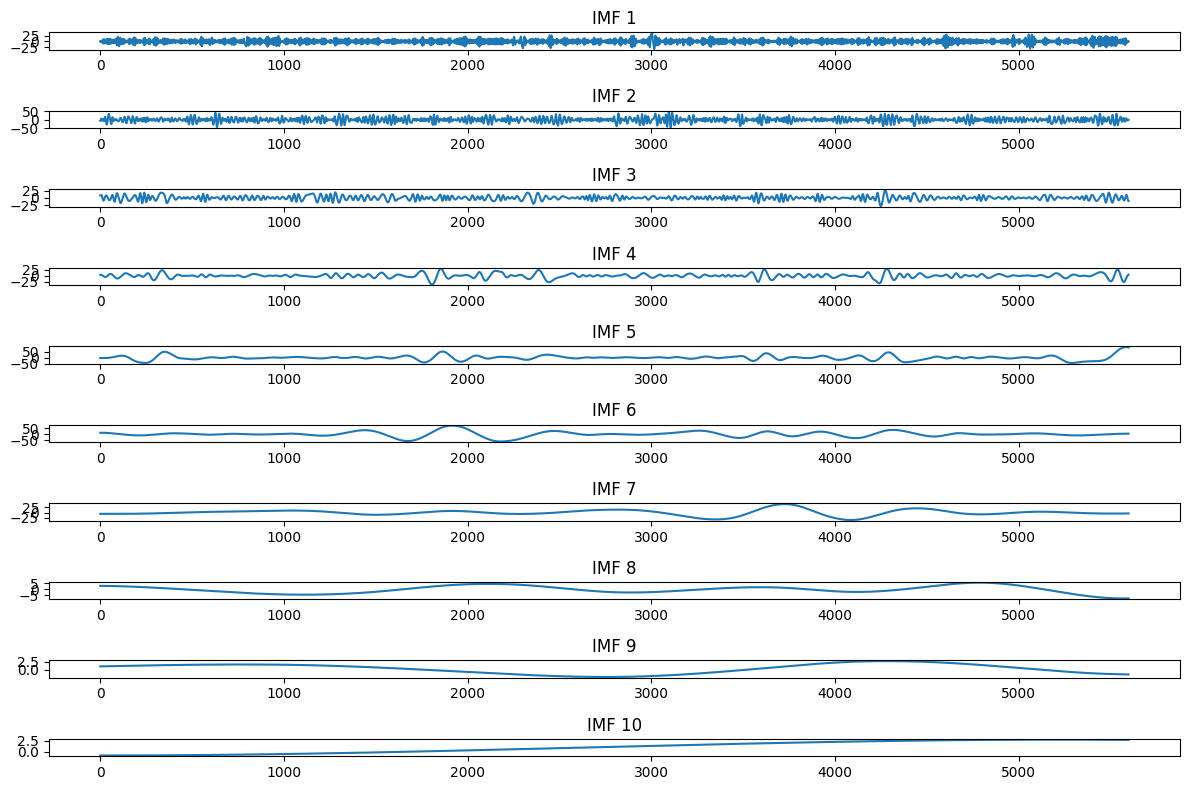

In [4]:
import pandas as pd
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt
from scipy.signal import detrend

# File path to your Excel file
file_path = '/content/signals of eeg and eye.xlsx'

# Load the data from Excel
signal_data = pd.read_excel(file_path, sheet_name='Sheet1').iloc[:, 0].dropna().values

# Detrend the signal to remove linear trends
signal_data = detrend(signal_data)

# Initialize EMD object
emd = EMD()

# Decompose the signal into Intrinsic Mode Functions (IMFs)
imfs = emd(signal_data)

# Plot each IMF
plt.figure(figsize=(12, 8))
for i, imf in enumerate(imfs):
    plt.subplot(len(imfs), 1, i + 1)
    plt.plot(imf)
    plt.title(f"IMF {i+1}")
plt.tight_layout()
plt.show()


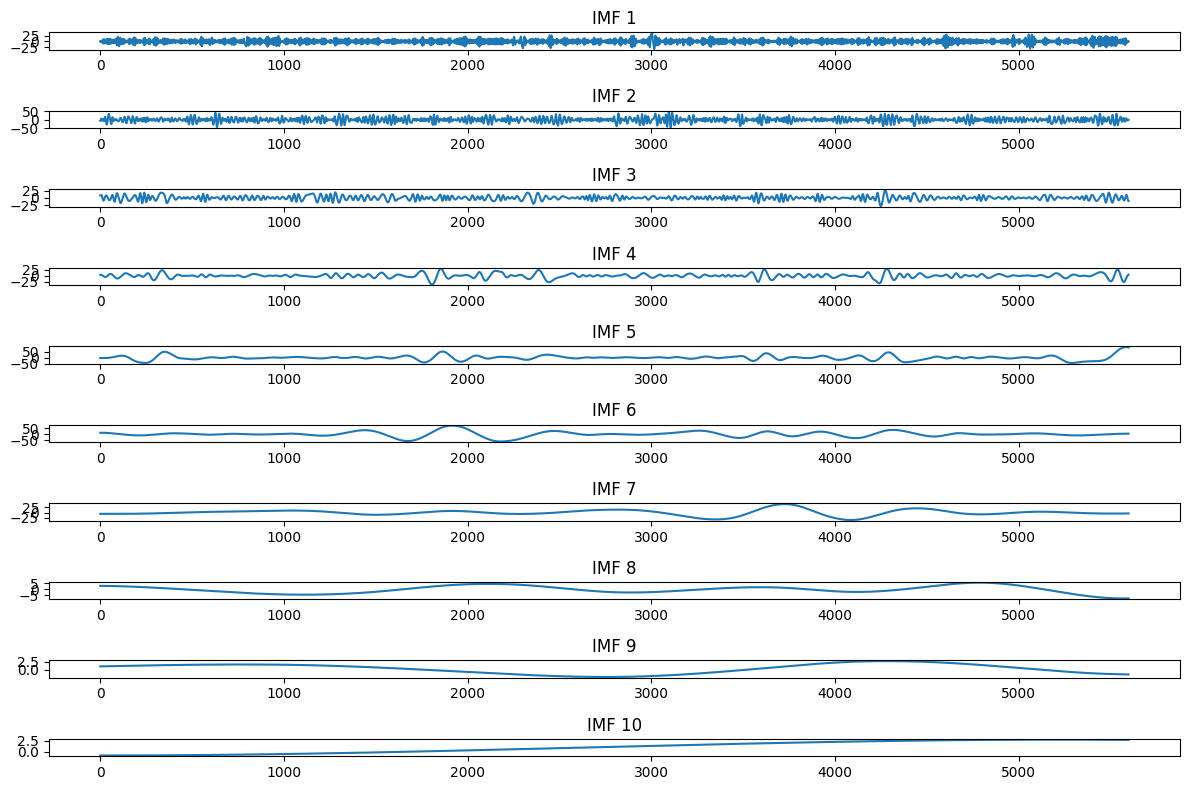

IMFs have been saved to both CSV and Excel formats.


In [ ]:
import pandas as pd
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt
from scipy.signal import detrend

# File path to your Excel file
input_file_path = '/content/signals of eeg and eye.xlsx'
output_file_path_csv = '/content/IMFs_output.csv'
output_file_path_excel = '/content/IMFs_output.xlsx'

# Load the data from Excel
signal_data = pd.read_excel(input_file_path, sheet_name='Sheet1').iloc[:, 0].dropna().values

# Detrend the signal to remove linear trends
signal_data = detrend(signal_data)

# Initialize EMD object
emd = EMD()

# Decompose the signal into Intrinsic Mode Functions (IMFs)
imfs = emd(signal_data)

# Convert IMFs to a DataFrame to save
imf_df = pd.DataFrame(imfs.T, columns=[f'IMF_{i+1}' for i in range(imfs.shape[0])])

# Save to CSV
imf_df.to_csv(output_file_path_csv, index=False)

# Save to Excel
imf_df.to_excel(output_file_path_excel, index=False)

# Plot each IMF for visualization
plt.figure(figsize=(12, 8))
for i, imf in enumerate(imfs):
    plt.subplot(len(imfs), 1, i + 1)
    plt.plot(imf)
    plt.title(f"IMF {i+1}")
plt.tight_layout()
plt.show()

print("IMFs have been saved to both CSV and Excel formats.")


In [5]:
import pandas as pd
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt
from scipy.signal import detrend

# File path to your Excel file
file_path = '/content/signals of eeg and eye.xlsx'

# Load the data from Excel
signal_data = pd.read_excel(file_path, sheet_name='Sheet1').iloc[:, 0].dropna().values

# Detrend the signal to remove linear trends
signal_data = detrend(signal_data)

# Initialize EMD object
emd = EMD()

# Decompose the signal into Intrinsic Mode Functions (IMFs)
imfs = emd(signal_data)

# Plot each IMF and save to a file
plt.figure(figsize=(12, 8))
for i, imf in enumerate(imfs):
    plt.subplot(len(imfs), 1, i + 1)
    plt.plot(imf)
    plt.title(f"IMF {i+1}")
plt.tight_layout()

# Save the plot as a file
output_image_path = '/content/imf_decomposition_plot.png'  # Adjust the path as needed
plt.savefig(output_image_path)
plt.close()

# Save IMFs to an Excel file
imf_df = pd.DataFrame(imfs).T  # Transpose so each IMF is a row
output_excel_path = '/content/imfs_output.xlsx'  # Adjust the path as needed
imf_df.to_excel(output_excel_path, index=False)

print(f"IMF decomposition plot saved to: {output_image_path}")
print(f"IMFs saved to: {output_excel_path}")


IMF decomposition plot saved to: /content/imf_decomposition_plot.png
IMFs saved to: /content/imfs_output.xlsx


In [6]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis

# Load the IMF data from your Excel file
file_path = '/content/imfs_output.xlsx'  # Update with your file path
data = pd.read_excel(file_path)

# Select the first IMF column (assuming it’s the first column in the data)
first_imf = data.iloc[:, 0].dropna().values  # Remove NaNs if any

# Define a threshold (adjust as needed)
threshold = 0.5
filtered_imf = first_imf[first_imf > threshold]

# Calculate kurtosis on the filtered IMF data
kurt_value = kurtosis(filtered_imf)
print(f"Kurtosis of the first IMF after applying threshold: {kurt_value}")

Kurtosis of the first IMF after applying threshold: 3.2163676798925476


In [7]:
import pandas as pd
from scipy.stats import kurtosis

# Load the data
file_path = '/content/imfs_output.xlsx'
data = pd.read_excel(file_path, sheet_name="Sheet1")

# Calculate kurtosis for each column
kurtosis_results = {column: kurtosis(data[column], fisher=True) for column in data.columns}

# Convert results to a DataFrame for easy viewing
kurtosis_df = pd.DataFrame.from_dict(kurtosis_results, orient='index', columns=['kurtosis'])
print(kurtosis_df)


   kurtosis
0  0.679730
1  0.295135
2  0.603121
3  2.506065
4  4.205989
5  1.964168
6  1.371557
7 -0.553530
8 -1.205000
9 -1.507112


In [8]:
import os

# Ensure the output directory exists
output_dir = '/mnt/data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the file after ensuring the directory exists
output_path = os.path.join(output_dir, 'kurtosis_threshold_status.xlsx')
kurtosis_df.to_excel(output_path)
print(f"Kurtosis results with threshold status saved to {output_path}")


Kurtosis results with threshold status saved to /mnt/data/kurtosis_threshold_status.xlsx


In [9]:
# Save to the current working directory
output_path = 'kurtosis_threshold_status.xlsx'
kurtosis_df.to_excel(output_path)
print(f"Kurtosis results with threshold status saved to {output_path}")


Kurtosis results with threshold status saved to kurtosis_threshold_status.xlsx


In [10]:
import pandas as pd
from scipy.stats import kurtosis

# Load the data
file_path = '/content/imfs_output.xlsx'
sheet_name = 'Sheet1'  # Update the sheet name if necessary
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure numeric data
numeric_data = data.select_dtypes(include='number')

# Calculate kurtosis
kurtosis_results = {
    column: kurtosis(numeric_data[column].dropna(), fisher=True)
    for column in numeric_data.columns
}

# Convert results to a DataFrame
kurtosis_df = pd.DataFrame.from_dict(kurtosis_results, orient='index', columns=['Kurtosis'])

# Define thresholds
threshold_upper = 3
threshold_lower = -3

# Determine if columns are within or exceed thresholds
def classify_kurtosis(value, lower, upper):
    if value > upper:
        return "Exceeds Upper Threshold"
    elif value < lower:
        return "Exceeds Lower Threshold"
    else:
        return "Within Threshold"

kurtosis_df['Threshold_Status'] = kurtosis_df['Kurtosis'].apply(
    classify_kurtosis, lower=threshold_lower, upper=threshold_upper
)

# Save results to a new Excel file
output_path = '/content/kurtosis_threshold_status.xlsx'
kurtosis_df.to_excel(output_path)
print(f"Kurtosis results with threshold status saved to {output_path}")

# Output summary
print("Summary of threshold classifications:")
print(kurtosis_df)


Kurtosis results with threshold status saved to /content/kurtosis_threshold_status.xlsx
Summary of threshold classifications:
   Kurtosis         Threshold_Status
0  0.679730         Within Threshold
1  0.295135         Within Threshold
2  0.603121         Within Threshold
3  2.506065         Within Threshold
4  4.205989  Exceeds Upper Threshold
5  1.964168         Within Threshold
6  1.371557         Within Threshold
7 -0.553530         Within Threshold
8 -1.205000         Within Threshold
9 -1.507112         Within Threshold


In [11]:
import pandas as pd
from scipy.stats import kurtosis
import os

# Load the data
file_path = '/content/imfs_output.xlsx'
sheet_name = 'Sheet1'  # Update if necessary
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure numeric data
numeric_data = data.select_dtypes(include='number')

# Calculate kurtosis
kurtosis_results = {
    column: kurtosis(numeric_data[column].dropna(), fisher=True)
    for column in numeric_data.columns
}

# Convert results to a DataFrame
kurtosis_df = pd.DataFrame.from_dict(kurtosis_results, orient='index', columns=['Kurtosis'])

# Define thresholds
threshold_upper = 3
threshold_lower = -3

# Determine if columns are within or exceed thresholds
def classify_kurtosis(value, lower, upper):
    if value > upper:
        return "Exceeds Upper Threshold"
    elif value < lower:
        return "Exceeds Lower Threshold"
    else:
        return "Within Threshold"

kurtosis_df['Threshold_Status'] = kurtosis_df['Kurtosis'].apply(
    classify_kurtosis, lower=threshold_lower, upper=threshold_upper
)

# Split data into two categories
within_threshold = kurtosis_df[kurtosis_df['Threshold_Status'] == "Within Threshold"]
upper_threshold = kurtosis_df[kurtosis_df['Threshold_Status'] == "Exceeds Upper Threshold"]
lower_threshold = kurtosis_df[kurtosis_df['Threshold_Status'] == "Exceeds Lower Threshold"]

# Ensure the output directory exists
output_dir = '/mnt/data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save results into different sheets in a single Excel file
output_path = os.path.join(output_dir, 'kurtosis_threshold_separation.xlsx')
with pd.ExcelWriter(output_path) as writer:
    within_threshold.to_excel(writer, sheet_name='Within Threshold')
    upper_threshold.to_excel(writer, sheet_name='Exceeds Upper Threshold')
    lower_threshold.to_excel(writer, sheet_name='Exceeds Lower Threshold')

print(f"Separated results saved to {output_path}")


Separated results saved to /mnt/data/kurtosis_threshold_separation.xlsx


In [12]:
from google.colab import files
files.download('/mnt/data/kurtosis_threshold_separation.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
pip install pandas openpyxl


In [15]:
import pandas as pd

# Load your Excel file
file_path = "/content/imfs_output.xlsx"  # Replace with your actual file path
df = pd.read_excel(file_path)

# Separate the 5th column (index 4)
col_5 = df.iloc[:, 4]
other_columns = df.drop(columns=[4])

# Reshape the remaining columns into one column
other_columns_melted = pd.melt(other_columns, value_vars=other_columns.columns)
other_columns_melted = other_columns_melted.drop(columns=["variable"])
other_columns_melted.columns = ["Value"]
other_columns_melted["Label"] = 0

# Prepare the 5th column data
col_5_df = pd.DataFrame({"Value": col_5, "Label": 1})

# Save to Excel
col_5_file = "col_5.xlsx"
other_columns_file = "other_columns_updated.xlsx"

col_5_df.to_excel(col_5_file, index=False)
other_columns_melted.to_excel(other_columns_file, index=False)

print(f"Files saved:\n1. {col_5_file}\n2. {other_columns_file}")


Files saved:
1. col_5.xlsx
2. other_columns_updated.xlsx


In [16]:
import pandas as pd

# Load the two Excel files
col_5_file = "col_5.xlsx"  # Replace with your actual file path
other_columns_file = "other_columns_updated.xlsx"  # Replace with your actual file path

col_5_df = pd.read_excel(col_5_file)
other_columns_df = pd.read_excel(other_columns_file)

# Merge the two dataframes
merged_df = pd.concat([col_5_df, other_columns_df], ignore_index=True)

# Save the merged dataframe to a new Excel file
merged_file = "merged_file.xlsx"
merged_df.to_excel(merged_file, index=False)

print(f"Merged file saved as: {merged_file}")


Merged file saved as: merged_file.xlsx


In [17]:
pip install pandas scikit-learn pyclustering openpyxl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 34.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395099 sha256=44411d1fd6a5793c0ae7828d4adfa0bc5e6cd967fe472a64686977c547f9ab57
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [ ]:
import pandas as pd
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import distance_metric, type_metric
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Load the merged file
merged_file = "/content/merged_file.xlsx"  # Replace with your actual file path
df = pd.read_excel(merged_file)

# Separate features and labels
if 'Label' in df.columns:
    X = df.drop(columns=['Label']).values  # Features
    y = df['Label'].values  # Labels
else:
    X = df.values  # Use this if 'Label' column is absent

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize k-medoids parameters
k = 2  # Set k as the number of clusters you want
initial_medoids = list(range(k))  # Initial medoids (indices of X_train_scaled)

# Create a k-medoids instance with Euclidean distance metric
metric = distance_metric(type_metric.EUCLIDEAN)
kmedoids_instance = kmedoids(X_train_scaled, initial_medoids, metric=metric)

# Train the k-medoids model on the training data
kmedoids_instance.process()
train_clusters = kmedoids_instance.get_clusters()  # Training clusters
medoids = kmedoids_instance.get_medoids()          # Medoids indices

# Testing: assign test data points to the nearest medoid
def assign_to_nearest_medoids(data, medoids, metric):
    test_clusters = []
    for point in data:
        # Calculate the distance to each medoid and find the closest one
        distances = [metric(point, X_train_scaled[medoid]) for medoid in medoids]
        nearest_medoid = np.argmin(distances)
        test_clusters.append(nearest_medoid)
    return test_clusters

# Get test clusters without considering labels
test_clusters = assign_to_nearest_medoids(X_test_scaled, medoids, metric)

# Print results
print("Training Clusters:", train_clusters)
print("Training Medoids:", medoids)
print("Test Clusters:", test_clusters)


Training Clusters: [[0, 2, 3, 5, 7, 14, 15, 18, 21, 23, 29, 31, 34, 41, 45, 46, 58, 62, 66, 71, 74, 75, 76, 77, 79, 81, 87, 92, 93, 97, 99, 101, 105, 107, 108, 111, 112, 114, 116, 117, 120, 122, 123, 125, 127, 129, 132, 134, 138, 139, 140, 146, 148, 153, 157, 165, 169, 170, 172, 182, 188, 190, 191, 193, 199, 200, 203, 209, 212, 213, 221, 226, 227, 234, 235, 237, 240, 247, 250, 252, 253, 255, 256, 259, 260, 267, 268, 270, 274, 279, 286, 293, 297, 299, 305, 306, 316, 317, 318, 321, 328, 335, 336, 341, 342, 343, 347, 350, 354, 356, 361, 366, 371, 379, 380, 383, 384, 387, 388, 389, 397, 398, 399, 402, 406, 415, 432, 442, 443, 446, 453, 454, 460, 463, 466, 467, 469, 475, 477, 479, 484, 486, 490, 491, 494, 495, 502, 503, 504, 505, 507, 508, 510, 516, 517, 521, 524, 525, 527, 535, 536, 537, 544, 551, 552, 553, 556, 557, 561, 562, 564, 570, 571, 572, 574, 575, 578, 579, 582, 587, 595, 599, 605, 609, 610, 611, 614, 615, 616, 622, 623, 625, 626, 627, 633, 635, 638, 639, 641, 649, 655, 656, 657, 

In [2]:
import pandas as pd
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import distance_metric, type_metric
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the merged file
merged_file = "/content/merged_file.xlsx"  # Replace with your actual file path
df = pd.read_excel(merged_file)

# Separate features and labels
if 'Label' in df.columns:
    features = df.drop(columns=['Label']).values
    labels = df['Label'].values
else:
    features = df.values
    labels = None

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split into training and testing sets
# Here we assume you want to use part of the data for training and another part for testing
train_ratio = 0.8  # 80% for training, 20% for testing
train_size = int(len(features_scaled) * train_ratio)
train_data = features_scaled[:train_size]
test_data = features_scaled[train_size:]

# Initialize k-medoids clustering on training data
# Define the number of clusters (k) and initial medoid indices
k = 3  # Example: adjust this based on your clustering needs
initial_medoids = list(range(k))

# Euclidean distance metric
metric = distance_metric(type_metric.EUCLIDEAN)

# Create a k-medoids instance
kmedoids_instance = kmedoids(train_data, initial_medoids, metric=metric)

# Run k-medoids clustering on training data
kmedoids_instance.process()
train_clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

# Test the model by assigning each test point to the nearest medoid
def assign_to_nearest_medoids(data, medoids, metric):
    assigned_clusters = []
    for point in data:
        distances = [metric(point, train_data[medoid]) for medoid in medoids]
        assigned_clusters.append(np.argmin(distances))
    return assigned_clusters

# Assign test data points to the nearest cluster centers
test_clusters = assign_to_nearest_medoids(test_data, medoids, metric)

# Display results
print("Training Clusters:", train_clusters)
print("Training Medoids:", medoids)
print("Test Cluster Assignments:", test_clusters)


Training Clusters: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 294, 295, 296, 297, 298, 299, 300, 301, 302, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 616, 617,